<a href="https://colab.research.google.com/github/supatsara2002/bsc_dpdm22/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import data

In [26]:
wine_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/project/winemag-data-130k-v2.csv')
wine_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# ตรวจสอบ Missing

In [27]:
wine_data.isnull().any()

Unnamed: 0               False
country                   True
description              False
designation               True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

In [28]:
wine_data_clean = wine_data.dropna()

In [29]:
wine_data_clean.isnull().any()

Unnamed: 0               False
country                  False
description              False
designation              False
points                   False
price                    False
province                 False
region_1                 False
region_2                 False
taster_name              False
taster_twitter_handle    False
title                    False
variety                  False
winery                   False
dtype: bool

# Classification

##DecisionTree

In [30]:
#กำหนด features และ target
X = wine_data_clean[['points', 'price']]
y = wine_data_clean['variety']

#แบ่งข้อมูลออกเป็น training set และ test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#สร้าง model และ train ด้วย training set
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=3,min_samples_leaf=5,max_depth=4)
dtc.fit(X_train, y_train)

#ทำการ predict ด้วย test set
y_pred = dtc.predict(X_test)

#คำนวณค่า accuracy ของ model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.23760607414024118


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

                                precision    recall  f1-score   support

                      Abouriou       0.00      0.00      0.00         1
                      Albariño       0.00      0.00      0.00         5
                       Aligoté       0.00      0.00      0.00         1
                     Auxerrois       0.00      0.00      0.00         2
                       Barbera       0.00      0.00      0.00        25
              Barbera-Nebbiolo       0.00      0.00      0.00         1
                 Blaufränkisch       0.00      0.00      0.00         2
      Bordeaux-style Red Blend       0.00      0.00      0.00       205
    Bordeaux-style White Blend       0.00      0.00      0.00         4
                Cabernet Blend       0.00      0.00      0.00         1
                Cabernet Franc       0.00      0.00      0.00        48
         Cabernet Franc-Merlot       0.00      0.00      0.00         1
            Cabernet Sauvignon       0.60      0.15      0.25  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


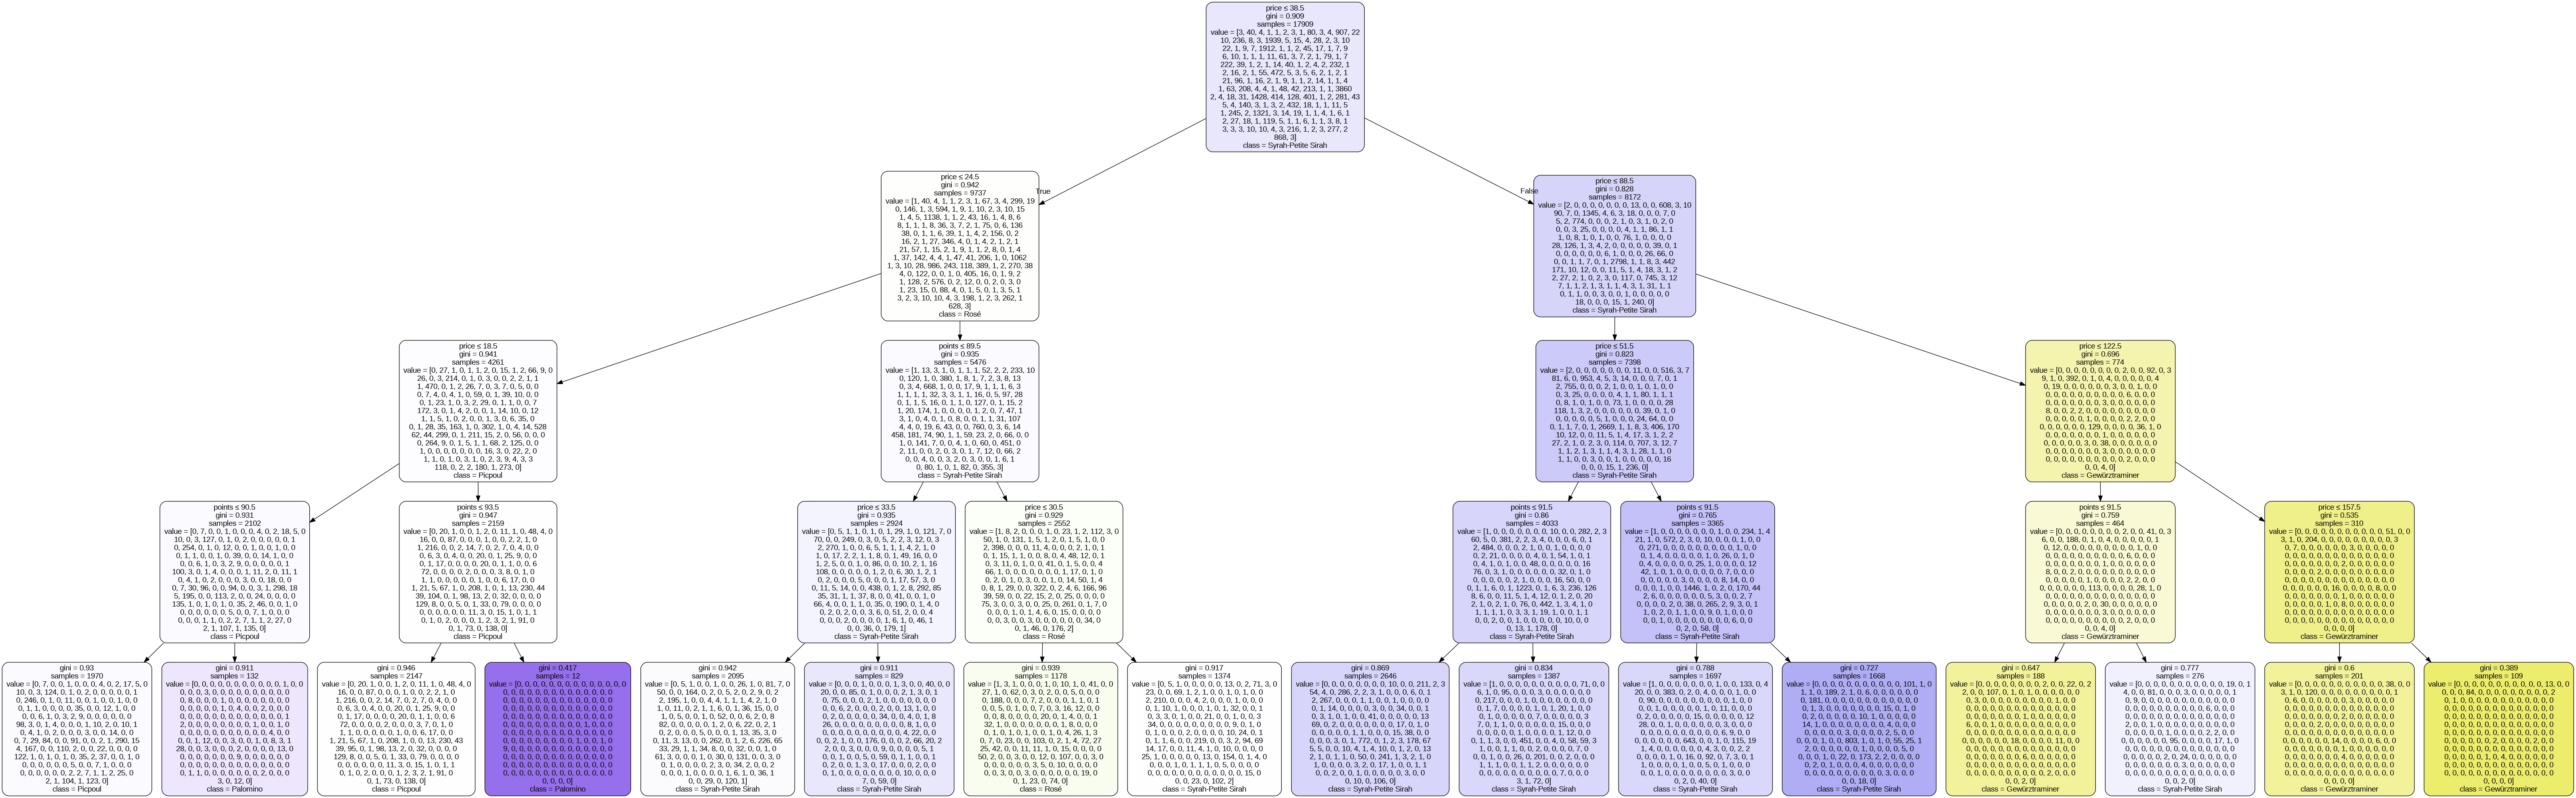

In [32]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.unique(),  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
Image(graph.pipe(format='png'))

[Text(0.5, 0.9, 'x[1] <= 38.5\ngini = 0.909\nsamples = 17909\nvalue = [3, 40, 4, 1, 1, 2, 3, 1, 80, 3, 4, 907, 22\n10, 236, 8, 3, 1939, 5, 15, 4, 28, 2, 3, 10\n22, 1, 9, 7, 1912, 1, 1, 2, 45, 17, 1, 7, 9\n6, 10, 1, 1, 1, 11, 61, 3, 7, 2, 1, 79, 1, 7\n222, 39, 1, 2, 1, 14, 40, 1, 2, 4, 2, 232, 1\n2, 16, 2, 1, 55, 472, 5, 3, 5, 6, 2, 1, 2, 1\n21, 96, 1, 16, 2, 1, 9, 1, 1, 2, 14, 1, 1, 4\n1, 63, 208, 4, 4, 1, 48, 42, 213, 1, 1, 3860\n2, 4, 18, 31, 1428, 414, 128, 401, 1, 2, 281, 43\n5, 4, 140, 3, 1, 3, 2, 432, 18, 1, 1, 11, 5\n1, 245, 2, 1321, 3, 14, 19, 1, 1, 4, 1, 6, 1\n2, 27, 18, 1, 119, 5, 1, 1, 6, 1, 1, 3, 8, 1\n3, 3, 3, 10, 10, 4, 3, 216, 1, 2, 3, 277, 2\n868, 3]'),
 Text(0.25, 0.7, 'x[1] <= 24.5\ngini = 0.942\nsamples = 9737\nvalue = [1, 40, 4, 1, 1, 2, 3, 1, 67, 3, 4, 299, 19\n0, 146, 1, 3, 594, 1, 9, 1, 10, 2, 3, 10, 15\n1, 4, 5, 1138, 1, 1, 2, 43, 16, 1, 4, 8, 6\n8, 1, 1, 1, 8, 36, 3, 7, 2, 1, 75, 0, 6, 136\n38, 0, 1, 1, 6, 39, 1, 1, 4, 2, 156, 0, 2\n16, 2, 1, 27, 346, 4, 0, 1, 

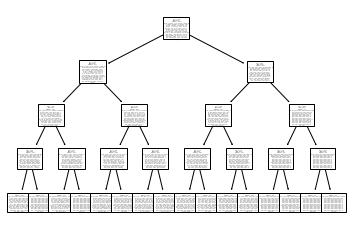

In [33]:
from sklearn.tree import plot_tree

plot_tree(dtc)

DecisionTree ได้ค่า Accuracy: 0.2541725060517263

##Naive Bays

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [35]:
# เลือกเฉพาะคอลัมน์ "variety" และ "description"
wine_data2 = wine_data_clean[["variety", "description"]]

# แปลงคอลัมน์ "variety" เป็นตัวเลขโดยใช้ LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_data2["variety_num"] = le.fit_transform(wine_data2["variety"])

# แบ่งข้อมูลเป็นชุด train และ test โดยสุ่มอัตราส่วน 70:30
train_data, test_data, train_labels, test_labels = train_test_split(
    wine_data2["description"], wine_data2["variety_num"], test_size=0.3, random_state=3)

# แปลงข้อมูลข้อความเป็นเวกเตอร์จำนวนเต็มโดยใช้ CountVectorizer
cv = CountVectorizer()
train_vectors = cv.fit_transform(train_data)
test_vectors = cv.transform(test_data)

# สร้างโมเดล Naive Bayes และฝึกโมเดลด้วยชุด train
nb_model = MultinomialNB()
nb_model.fit(train_vectors, train_labels)

# ใช้โมเดลทำนายค่า test
predicted_labels = nb_model.predict(test_vectors)

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

<ipython-input-35-869fc4138a72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data2["variety_num"] = le.fit_transform(wine_data2["variety"])


Accuracy: 0.5515855292541313


Naive Bays ได้ค่า Accuracy: 0.632549052917693

##k-Nearest Neighbor

In [36]:
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

# สร้าง LabelEncoder object สำหรับแปลงข้อมูลของคอลัมน์ 'variety' เป็นตัวเลข
le = preprocessing.LabelEncoder()
wine_data_clean['variety'] = le.fit_transform(wine_data_clean['variety'])

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลขมาใช้ในการ Train Model
X = wine_data_clean[['price', 'points', 'variety']]

# แยกข้อมูล Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X, wine_data_clean['price'], test_size=0.2)

# สร้าง Model ของ k-Nearest Neighbor
clf = neighbors.KNeighborsRegressor()

# Train Model ด้วยข้อมูล Train
clf.fit(X_train, y_train)

# ทดสอบ Model ด้วยข้อมูล Test
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.658937674847259


<ipython-input-36-cdb55e47ba96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean['variety'] = le.fit_transform(wine_data_clean['variety'])


k-Nearest Neighbor ได้ค่า accuracy: 0.9888577583467251

##Association Rules

In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [39]:
# กำหนดเงื่อนไขในการกรองข้อมูลโดยต้องเป็นไวน์ที่มาจากประเทศ US และมีคะแนน 90 ขึ้นไป
conditions = (wine_data['country'] == 'US') & (wine_data['points'] >= 90)

In [40]:
# กรองข้อมูลชื่อสายพันธุ์ (variety) และชื่อโรงเรียนผลิตไวน์ (winery)
df_filtered = wine_data.loc[conditions, ['variety', 'winery']]

In [41]:
# ลบ missing values
df_filtered.dropna(inplace=True)

In [42]:
# แปลงข้อมูลเป็น list of list
transactions = df_filtered.values.tolist()

In [43]:
# สร้าง TransactionEncoder object
te = TransactionEncoder()

In [44]:
# ใช้ TransactionEncoder object แปลงข้อมูล
te_ary = te.fit(transactions).transform(transactions)

In [45]:
# แปลงข้อมูลเป็น DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [46]:
# หา itemsets ที่มีความถี่อย่างน้อย 0.001
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.001075,(Abacela)
1,0.001120,(Abeja)
2,0.002956,(Adelsheim)
3,0.002060,(Albariño)
4,0.001433,(Alma Rosa)
...,...,...
324,0.001702,"(Trisaetum, Riesling)"
325,0.001568,"(Zinfandel, Robert Biale)"
326,0.002150,"(Sparkling Blend, Schramsberg)"
327,0.001523,"(Terre Rouge, Syrah)"


In [47]:
# หา association rules โดยกำหนดค่าความน่าสนใจของ association rules เป็น lift >= 1.5
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pinot Noir),(Adelsheim),0.244166,0.002956,0.001971,0.008072,2.730386,0.001249,1.005157
1,(Adelsheim),(Pinot Noir),0.002956,0.244166,0.001971,0.666667,2.730386,0.001249,2.267503
2,(Pinot Noir),(Archery Summit),0.244166,0.001792,0.001568,0.006421,3.583631,0.001130,1.004659
3,(Archery Summit),(Pinot Noir),0.001792,0.244166,0.001568,0.875000,3.583631,0.001130,6.046674
4,(Pinot Noir),(Arista),0.244166,0.001568,0.001209,0.004953,3.159446,0.000827,1.003402
...,...,...,...,...,...,...,...,...,...
131,(Schramsberg),(Sparkling Blend),0.002777,0.013035,0.002150,0.774194,59.394746,0.002114,4.370846
132,(Terre Rouge),(Syrah),0.002867,0.077223,0.001523,0.531250,6.879441,0.001302,1.968591
133,(Syrah),(Terre Rouge),0.077223,0.002867,0.001523,0.019722,6.879441,0.001302,1.017194
134,(Zaca Mesa),(Syrah),0.002105,0.077223,0.001030,0.489362,6.337007,0.000868,1.807105


In [48]:
# เรียงลำดับ association rules ตามค่า lift จากมากไปน้อย
rules = rules.sort_values(by=['lift'], ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,(Mumm Napa),(Sparkling Blend),0.001433,0.013035,0.001389,0.968750,74.320769,0.001370,31.582889
96,(Sparkling Blend),(Mumm Napa),0.013035,0.001433,0.001389,0.106529,74.320769,0.001370,1.117626
131,(Schramsberg),(Sparkling Blend),0.002777,0.013035,0.002150,0.774194,59.394746,0.002114,4.370846
130,(Sparkling Blend),(Schramsberg),0.013035,0.002777,0.002150,0.164948,59.394746,0.002114,1.194205
66,(Sparkling Blend),(Gloria Ferrer),0.013035,0.002329,0.001702,0.130584,56.063310,0.001672,1.147519
...,...,...,...,...,...,...,...,...,...
116,(Talley),(Pinot Noir),0.002374,0.244166,0.001030,0.433962,1.777327,0.000451,1.335307
92,(Marimar Estate),(Pinot Noir),0.002688,0.244166,0.001165,0.433333,1.774751,0.000508,1.333825
93,(Pinot Noir),(Marimar Estate),0.244166,0.002688,0.001165,0.004770,1.774751,0.000508,1.002092
47,(Chardonnay),(Williams Selyem),0.123359,0.008152,0.001747,0.014161,1.737084,0.000741,1.006095


lift คือค่าที่บ่งบอกถึงความสัมพันธ์ของสินค้า โดย lift มากกว่า 1 แสดงว่าการซื้อสินค้า A จะเป็นที่เป็นไปได้สูงขึ้นเมื่อลูกค้าซื้อสินค้า B ด้วย

In [49]:
# แสดงผลลัพธ์
print(rules.head())

           antecedents        consequents  antecedent support  \
97         (Mumm Napa)  (Sparkling Blend)            0.001433   
96   (Sparkling Blend)        (Mumm Napa)            0.013035   
131      (Schramsberg)  (Sparkling Blend)            0.002777   
130  (Sparkling Blend)      (Schramsberg)            0.013035   
66   (Sparkling Blend)    (Gloria Ferrer)            0.013035   

     consequent support   support  confidence       lift  leverage  conviction  
97             0.013035  0.001389    0.968750  74.320769  0.001370   31.582889  
96             0.001433  0.001389    0.106529  74.320769  0.001370    1.117626  
131            0.013035  0.002150    0.774194  59.394746  0.002114    4.370846  
130            0.002777  0.002150    0.164948  59.394746  0.002114    1.194205  
66             0.002329  0.001702    0.130584  56.063310  0.001672    1.147519  


จากการทำAssociation Rules พบว่าลูกค้าส่วนใหญ่ซื้อRobert Mondav จะซื้อFumé Blancด้วย ซึ่งมีค่า lift สูงที่สุด

##k-Means Clustering

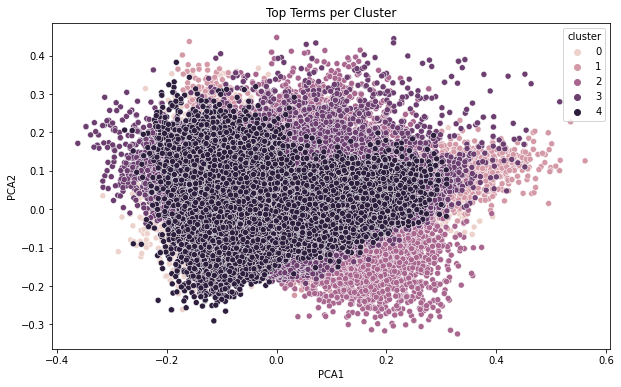

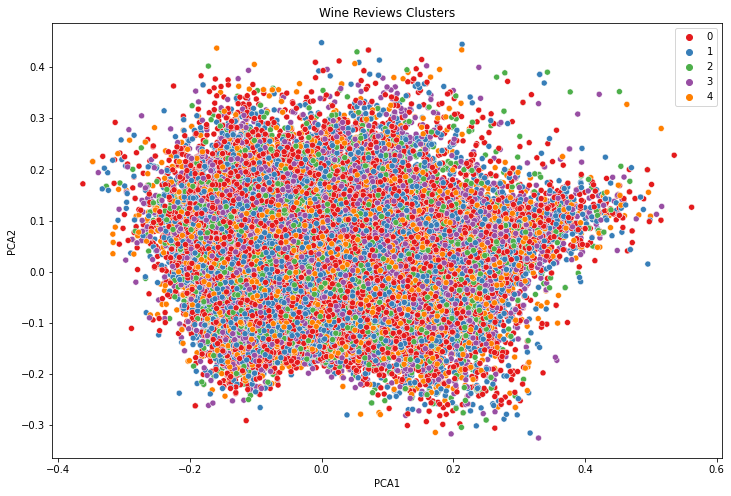

[0]


In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select 'description' column
df = wine_data['description']

# Vectorize with CountVectorizer and TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
X = count_vectorizer.fit_transform(df)
tfidf_matrix = tfidf_vectorizer.fit_transform(df)

# Cluster with KMeans
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

# Predict cluster labels for all wine reviews
cluster_labels = model.predict(X)

# Create a new dataframe with the wine review text and the predicted cluster label
df_clusters = pd.DataFrame({'text': df, 'cluster': cluster_labels})

# Visualize clusters with top terms using scatter plots
top_terms_per_cluster = pd.DataFrame()
for i in range(k):
    # Get wine reviews in cluster i
    cluster_i = df_clusters[df_clusters['cluster'] == i]['text']
    # Vectorize with TfidfVectorizer
    tfidf_vectorizer_i = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
    tfidf_matrix_i = tfidf_vectorizer_i.fit_transform(cluster_i)
    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(tfidf_matrix_i.toarray())
    pca_features = pca.transform(tfidf_matrix_i.toarray())
    # Create dataframe with top terms per cluster
    top_terms_i = pd.DataFrame({'PCA1': pca_features[:,0], 'PCA2': pca_features[:,1], 'cluster': i})
    top_terms_per_cluster = pd.concat([top_terms_per_cluster, top_terms_i])

# Visualize clusters with top terms using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", data=top_terms_per_cluster, hue='cluster')
plt.title("Top Terms per Cluster")
plt.show()

# Plot all clusters in one plot with different colors
plt.figure(figsize=(12,8))
sns.scatterplot(x="PCA1", y="PCA2", hue=model.labels_, data=top_terms_per_cluster, palette='Set1')
plt.title('Wine Reviews Clusters')
plt.show()

# Test prediction using a sample text from the dataset
sample_text = "This wine has a good acidity and a long finish"
Y = count_vectorizer.transform([sample_text])
prediction = model.predict(Y)
print(prediction)
